In [1]:
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
load_dotenv()

False

Impact of Crime Rates on Real Estate Prices 

This analysis examines the relationship between crime rates and real estate prices in ten major U.S. cities, using data sourced from the FBI's Uniform Crime Reporting (UCR) database. The dataset includes annual figures for both violent and property crimes, organized by year and state.

Data Integrity and Adjustments

The UCR data is provided voluntarily by local law enforcement agencies, which leads to some inconsistencies and gaps. Notably, in April 2015, Portland and 40 surrounding communities transitioned to a new $12.6 million reporting system, resulting in a lapse in data reporting for that year. To address this gap, we "healed" the dataset by averaging the crime figures from 2014 and 2016, thereby providing a continuous data set for Portland ([OregonLive report](https://www.oregonlive.com/portland/2016/06/portland_to_be_left_out_of_fbi.html)).

In Miami, the local UCR data was missing for the same year; however, crime figures were obtained from the city's official website and incorporated into the analysis.

Additionally, The Marshall Project highlights a broader issue: approximately 7,000 of the 18,000 law enforcement agencies, covering about 35% of the U.S. population, did not submit their crime data due to a transition to the FBI's new National Incident-Based Reporting System. Many municipalities and several states were unable to adapt to this change in time, leading to the exclusion of 2021 crime data from this study ([The Marshall Project report](https://www.themarshallproject.org/2022/10/08/the-problem-with-the-fbi-s-missing-crime-data)).

Crime Rate Calculation

To facilitate a comparative analysis across diverse urban populations, crime figures were normalized by the respective city populations provided in the FBI data. This adjustment allowed us to express the crime rate as a percentage of the population.

Research Hypothesis

The guiding hypothesis for this study was that an increase in crime rates would correlate with a decrease in real estate prices in the examined cities. The subsequent sections detail the methods used for analyzing the data, the statistical tests employed, and the findings of this investigation.

In [2]:
#Creates a list of cities that will be studied
cities=["Las Vegas","San Francisco", "Miami", "Portland", "Washington" , "Detroit" , "Baltimore", "Atlanta", "Tampa", "New Orleans"]

Data Preparation for Real Estate Price Analysis

The foundational data for our study on real estate prices was sourced from Zillow, renowned for its comprehensive housing market data. This dataset was meticulously structured around several key geographical identifiers necessary for isolating data specific to each city under study. These identifiers include:

RegionName: This field specifies the name of the region or city, which is the primary geographical unit of analysis.
StateName: This field provides the state in which the region is located, allowing for state-level aggregation and comparisons.
Metro: This attribute indicates the metropolitan area encompassing the region, useful for understanding broader market dynamics that might influence local real estate prices.

The study spans from 2012 to 2022, a period chosen to explore various factors that might impact real estate prices over a significant duration. By examining data across these years, we aim to identify trends and draw insights into the drivers of real estate market fluctuations.

In [3]:
#Reads in housing price data from Zillow .csv
house_values_df = pd.read_csv("house_values_zillow.csv")
#Filters relevant columns. The data structured so that the 'RegionName', 'StateName' and 'Metro' are all necessary to sort the data by city
hv_filtered = house_values_df[["RegionName", "StateName", "Metro","2012-01-31","2013-01-31","2014-01-31","2015-01-31","2016-01-31","2017-01-31","2018-01-31","2019-01-31","2020-01-31","2021-01-31","2022-01-31"]] #only the columns I want

states = ["GA","CA", "DC", "MI", "FL", "LA", "MD", "OR", "NV"]
metro = ["Las Vegas-Henderson-Paradise, NV", "San Francisco-Oakland-Berkeley, CA", "Miami-Fort Lauderdale-Pompano Beach, FL", "Portland-Vancouver-Hillsboro, OR-WA", "Washington-Arlington-Alexandria, DC-VA-MD-WV", "Detroit-Warren-Dearborn, MI", "Baltimore-Columbia-Towson, MD", "Atlanta-Sandy Springs-Alpharetta, GA", "Tampa-St. Petersburg-Clearwater, FL", "New Orleans-Metairie, LA"]
years = np.arange(2012,2022,1)
filtered_states_df = hv_filtered[hv_filtered.isin(states).any(axis=1)]
filtered_cities_df = filtered_states_df[filtered_states_df.isin(cities).any(axis=1)]
filtered_metro_df = filtered_cities_df[filtered_cities_df.isin(metro).any(axis=1)]
# filtered_hv_21_22_df.head(10)
filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
filtered_metro_df['2014-01-31'] = filtered_metro_df['2014-01-31'].fillna(0)
filtered_metro_df['2015-01-31'] = filtered_metro_df['2015-01-31'].fillna(0)
filtered_metro_df['2016-01-31'] = filtered_metro_df['2016-01-31'].fillna(0)
filtered_metro_df['2017-01-31'] = filtered_metro_df['2017-01-31'].fillna(0)
filtered_metro_df['2018-01-31'] = filtered_metro_df['2018-01-31'].fillna(0)
filtered_metro_df['2019-01-31'] = filtered_metro_df['2019-01-31'].fillna(0)
filtered_metro_df['2020-01-31'] = filtered_metro_df['2020-01-31'].fillna(0)
filtered_metro_df['2021-01-31'] = filtered_metro_df['2021-01-31'].fillna(0)
filtered_metro_df['2022-01-31'] = filtered_metro_df['2022-01-31'].fillna(0)
# filtered_hv_21_22_df.head(50)
filtered_metro_df['2012-01-31'] = round(filtered_metro_df['2012-01-31'], 2)
filtered_metro_df['2013-01-31'] = round(filtered_metro_df['2013-01-31'], 2)
filtered_metro_df['2014-01-31'] = round(filtered_metro_df['2014-01-31'], 2)
filtered_metro_df['2015-01-31'] = round(filtered_metro_df['2015-01-31'], 2)
filtered_metro_df['2016-01-31'] = round(filtered_metro_df['2016-01-31'], 2)
filtered_metro_df['2017-01-31'] = round(filtered_metro_df['2017-01-31'], 2)
filtered_metro_df['2018-01-31'] = round(filtered_metro_df['2018-01-31'], 2)
filtered_metro_df['2019-01-31'] = round(filtered_metro_df['2019-01-31'], 2)
filtered_metro_df['2020-01-31'] = round(filtered_metro_df['2020-01-31'], 2)
filtered_metro_df['2021-01-31'] = round(filtered_metro_df['2021-01-31'], 2)
filtered_metro_df['2022-01-31'] = round(filtered_metro_df['2022-01-31'], 2)
filtered_metro_df = filtered_metro_df.rename(columns={"RegionName":"Year"})
for i in range(2012,2023):
    filtered_metro_df = filtered_metro_df.rename(columns={f"{i}-01-31":f"{i}"})
real_estate_prices = filtered_metro_df.set_index("Year")
real_estate_prices.head(20)



C:\Users\puckr\AppData\Local\Temp\ipykernel_23196\294650385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2012-01-31'] = filtered_metro_df['2012-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_23196\294650385.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_metro_df['2013-01-31'] = filtered_metro_df['2013-01-31'].fillna(0)
C:\Users\puckr\AppData\Local\Temp\ipykernel_23196\294650385.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,StateName,Metro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Year,,,,,,,,,,,,,
Las Vegas,NV,"Las Vegas-Henderson-Paradise, NV",116934.02,132081.22,172615.98,186985.34,202048.00,213888.35,247569.68,280512.33,286778.62,305781.91,378531.44
San Francisco,CA,"San Francisco-Oakland-Berkeley, CA",615246.15,738878.23,856989.05,996609.03,1153086.87,1145789.14,1254291.74,1306153.19,1330689.65,1347232.32,1437822.96
Miami,FL,"Miami-Fort Lauderdale-Pompano Beach, FL",176634.14,198546.61,243519.36,270890.51,299043.90,312017.37,324711.58,335967.65,347039.40,369467.39,430181.47
Portland,OR,"Portland-Vancouver-Hillsboro, OR-WA",241196.14,262656.43,294454.36,321556.13,376282.19,422003.08,438346.34,437420.14,445584.98,486544.44,540430.84
Washington,DC,"Washington-Arlington-Alexandria, DC-VA-MD-WV",359139.04,390497.70,438557.80,469496.04,499357.15,518851.06,538924.71,565816.32,577273.60,615740.57,631401.93
Detroit,MI,"Detroit-Warren-Dearborn, MI",18268.31,18558.24,21539.87,24639.40,28344.16,30799.03,35183.51,42025.86,46631.19,57106.31,68524.97
Baltimore,MD,"Baltimore-Columbia-Towson, MD",82727.12,88046.07,100469.70,102555.31,106097.47,110515.43,116700.62,126707.41,137095.08,148247.53,166225.16
Atlanta,GA,"Atlanta-Sandy Springs-Alpharetta, GA",129823.45,137038.97,164578.79,187047.11,212547.31,237702.12,267426.54,297186.94,305776.44,325108.90,367842.69
Tampa,FL,"Tampa-St. Petersburg-Clearwater, FL",94281.68,105523.51,125687.16,139028.21,157266.05,179400.84,198929.01,214526.43,227796.30,255955.56,312954.19


In [4]:
#Once the data has been filtered, the columns for state and metro are irrelevant and will cause problems because they are strings and not integers. This will cause problems when processing the numeric data in other columns in the future
real_estate_prices = real_estate_prices.drop(real_estate_prices.columns[0:2], axis=1)


In [5]:
#Reverses the axis in order to time series analyze
real_estate_prices = real_estate_prices.transpose()
#Eliminate the erronious extra column "Washington" that eluded both filters
real_estate_prices = real_estate_prices.iloc[:, :-1]
real_estate_prices

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans
2012,116934.02,615246.15,176634.14,241196.14,359139.04,18268.31,82727.12,129823.45,94281.68,133398.32
2013,132081.22,738878.23,198546.61,262656.43,390497.70,18558.24,88046.07,137038.97,105523.51,151844.94
2014,172615.98,856989.05,243519.36,294454.36,438557.80,21539.87,100469.70,164578.79,125687.16,169244.27
2015,186985.34,996609.03,270890.51,321556.13,469496.04,24639.40,102555.31,187047.11,139028.21,164669.67
2016,202048.00,1153086.87,299043.90,376282.19,499357.15,28344.16,106097.47,212547.31,157266.05,188042.57
2017,213888.35,1145789.14,312017.37,422003.08,518851.06,30799.03,110515.43,237702.12,179400.84,195911.78
2018,247569.68,1254291.74,324711.58,438346.34,538924.71,35183.51,116700.62,267426.54,198929.01,193453.83
2019,280512.33,1306153.19,335967.65,437420.14,565816.32,42025.86,126707.41,297186.94,214526.43,199919.76
2020,286778.62,1330689.65,347039.40,445584.98,577273.60,46631.19,137095.08,305776.44,227796.30,223361.01
2021,305781.91,1347232.32,369467.39,486544.44,615740.57,57106.31,148247.53,325108.90,255955.56,237387.08


Standardization of Dataset for Comparative Analysis

To ensure accurate comparisons across disparate values, all data sets were standardized by converting them to z-scores. This transformation neutralizes the effects of varying scales and units of measure, enabling a clear analysis of underlying patterns. By standardizing the data, we can effectively identify trends and correlations that are not influenced by differences in magnitude or measurement units.

In [6]:
#Scales the real estate pricing into z-scores in order to accurately compare disparate metrics
scaler = StandardScaler()
scaled_real_estate_prices = scaler.fit_transform(real_estate_prices)
scaled_real_estate_prices_df = scaled_df = pd.DataFrame(scaled_real_estate_prices, columns=real_estate_prices.columns)

In [7]:
#read in crime data and create data frame

crime_by_city_data = pd.read_csv("us_crime_data_by_city - Sheet1.csv")


In [8]:
#selecting relevant columns for crime analysis
crime_data = crime_by_city_data[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland ','Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans']]
#renaming columns so there is no conflict when the data is concat'd with the real estate price data frame
crime_data = crime_data.rename(columns={'Las Vegas' : 'Las Vegas Crime', 'San Francisco' : 'San Francisco Crime', 'Miami' : 'Miami Crime', 'Portland ' : 'Portland Crime', 'Washington' : 'Washington Crime', 'Detroit' : 'Detroit Crime', 'Baltimore' : 'Baltimore Crime', 'Atlanta' : 'Atlanta Crime', 'Tampa' : 'Tampa Crime', 'New Orleans' : 'New Orleans Crime'})

In [9]:
#scales the crime data into z-score in order accurately compare with real estate prices
scaler = StandardScaler()
scaled_crime_data = scaler.fit_transform(crime_data)
scaled_crime_data_df = scaled_df = pd.DataFrame(scaled_crime_data, columns=crime_data.columns)


In [10]:
#concat the crime data to the real estate data 
scaled_real_estate_prices_df.reset_index(drop=True, inplace=True)
scaled_crime_data_df.reset_index(drop=True, inplace=True)
crime_vs_real_estate = pd.concat([scaled_real_estate_prices_df, scaled_crime_data_df], axis=1, join='inner')
#adding the year column back in 
years = list(range(2012,2023))
crime_vs_real_estate['Year'] = years
#reordering columns to make years first
crime_vs_real_estate = crime_vs_real_estate[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland', 'Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans', 'Las Vegas Crime', 'San Francisco Crime', 'Miami Crime', 'Portland Crime', 'Washington Crime','Detroit Crime', 'Baltimore Crime', 'Atlanta Crime', 'Tampa Crime', 'New Orleans Crime']]
crime_vs_real_estate.set_index('Year', inplace=True)
crime_vs_real_estate




,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
Year,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489,0.712028,-1.208660,1.665677,-0.520894,-0.275726,1.736091,-0.093441,1.766050,1.326157,-0.180561
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063,0.783063,0.737130,1.313847,-1.080223,3.159647,1.730684,0.430778,1.250626,0.714380,-0.149343
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730,0.376599,-0.145802,1.028120,-0.249245,-0.250151,0.341076,-0.113377,0.937123,0.811289,0.194560
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807,2.123658,1.183324,0.543913,-0.410345,-0.281731,-0.819127,0.743772,0.617196,0.716851,-0.034433
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535,0.253097,-0.086144,0.269024,-0.452900,-0.276383,0.302840,0.821848,0.361433,0.306581,0.068826
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062,-0.049819,1.134009,-0.086511,0.694327,-0.331691,0.116075,1.556310,-0.189488,-0.098067,0.294495
2018,0.240767,0.568084,0.337394,0.549173,0.348004,-0.026734,-0.006258,0.369231,0.250748,0.023783,-0.299021,0.090684,-0.621940,0.203553,-0.315192,-0.217844,0.379141,-0.445913,-0.259648,0.506855
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399,-0.590280,-0.018712,-0.554120,-0.238049,-0.314413,-0.302906,0.080694,-0.922008,-0.312297,0.941910
2020,0.761179,0.863797,0.651508,0.627914,0.802333,0.704759,0.829311,0.872310,0.700922,0.854570,-1.778295,-2.018705,-1.482810,-1.287456,-0.369374,-1.479022,-0.383884,-0.951567,-0.488224,0.593991


In [11]:
#As 40% of US cities did not report data in 2021 including four in our dataset the year was removed from analysis
crime_vs_real_estate = crime_vs_real_estate[~crime_vs_real_estate.index.isin([2021])]


Analysis Using Pearson Correlation Matrix

The consolidated dataset was subsequently analyzed using a Pearson correlation matrix. This statistical tool employs Pearson coefficients to quantify and assess potential correlations among variables. By applying this method, we are able to systematically uncover any significant relationships within the data, providing a robust foundation for further analysis and interpretation.

In [12]:
#Creates a matrix of Pearson Coefficients to determine correlation
pearson_correlation_matrix = crime_vs_real_estate.corr()
pearson_correlation_matrix

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Crime,San Francisco Crime,Miami Crime,Portland Crime,Washington Crime,Detroit Crime,Baltimore Crime,Atlanta Crime,Tampa Crime,New Orleans Crime
Las Vegas,1.000000,0.935515,0.978030,0.962641,0.970913,0.980037,0.991566,0.988490,0.994139,0.972762,-0.621128,0.102882,-0.898845,0.632411,-0.428951,-0.651885,-0.626977,-0.947693,-0.796626,0.882961
San Francisco,0.935515,1.000000,0.972030,0.970767,0.990333,0.863740,0.897755,0.959454,0.922433,0.924354,-0.635408,0.093664,-0.957781,0.482782,-0.469982,-0.764811,-0.332879,-0.978921,-0.917807,0.865757
Miami,0.978030,0.972030,1.000000,0.985266,0.990057,0.936194,0.960610,0.975621,0.974632,0.974911,-0.578815,0.181818,-0.912743,0.644994,-0.475510,-0.698802,-0.486669,-0.955385,-0.832303,0.841987
Portland,0.962641,0.970767,0.985266,1.000000,0.983070,0.923510,0.936886,0.980685,0.970251,0.959742,-0.645659,0.151779,-0.927480,0.639189,-0.453445,-0.647360,-0.435650,-0.967723,-0.878919,0.861839
Washington,0.970913,0.990333,0.990057,0.983070,1.000000,0.914687,0.945161,0.982700,0.960637,0.958826,-0.640469,0.108549,-0.952733,0.549622,-0.473084,-0.749971,-0.429376,-0.985141,-0.891309,0.886179
Detroit,0.980037,0.863740,0.936194,0.923510,0.914687,1.000000,0.990041,0.960304,0.987562,0.959865,-0.608630,0.078059,-0.838216,0.665947,-0.367205,-0.540744,-0.727512,-0.885945,-0.709946,0.817573
Baltimore,0.991566,0.897755,0.960610,0.936886,0.945161,0.990041,1.000000,0.969495,0.989993,0.979654,-0.616580,0.085631,-0.872639,0.638014,-0.396284,-0.627214,-0.687232,-0.914374,-0.748232,0.838863
Atlanta,0.988490,0.959454,0.975621,0.980685,0.982700,0.960304,0.969495,1.000000,0.986246,0.960686,-0.684708,0.047316,-0.940735,0.578528,-0.448263,-0.673285,-0.539297,-0.976676,-0.862871,0.906553
Tampa,0.994139,0.922433,0.974632,0.970251,0.960637,0.987562,0.989993,0.986246,1.000000,0.978349,-0.627005,0.122645,-0.889495,0.671656,-0.403090,-0.602147,-0.630009,-0.937144,-0.790803,0.856560
New Orleans,0.972762,0.924354,0.974911,0.959742,0.958826,0.959865,0.979654,0.960686,0.978349,1.000000,-0.652778,0.115201,-0.890150,0.633467,-0.378829,-0.625959,-0.582748,-0.924296,-0.799942,0.810876


Graphical Representation of Pearson Coefficients and Crime Data Z-Scores

For each city included in the study, the Pearson Coefficients—representing the strength of correlation between variables—and the corresponding crime data z-scores were meticulously extracted. These values were then visually represented in a graph to facilitate a comparative analysis. This graphical approach allows for an intuitive assessment of the relationships between crime rates and other variables across different cities, highlighting trends and anomalies effectively.

0 Las Vegas -0.6211279695070251
1 San Francisco 0.09366356086732819
2 Miami -0.9127432787782482
3 Portland 0.6391887613812541
4 Washington -0.4730841042972658
5 Detroit -0.5407437335031545
6 Baltimore -0.6872319863131007
7 Atlanta -0.9766755760617095
8 Tampa -0.7908033394664514
9 New Orleans 0.8108759685113308


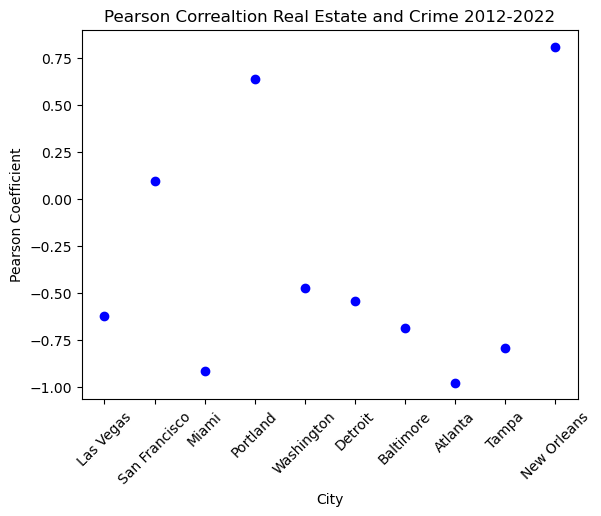

In [13]:
#Extract the Pearson Coefficient for each city for the real estate prices and populations changes from 2012-2024
city_pop_list= ['Las Vegas Crime', 'San Francisco Crime', 'Miami Crime', 'Portland Crime', 'Washington Crime','Detroit Crime', 'Baltimore Crime', 'Atlanta Crime', 'Tampa Crime', 'New Orleans Crime']

x = []
y = []
for i, city in enumerate(cities):
    x.append(city)
    y.append(pearson_correlation_matrix.loc[city, city_pop_list[i]])

    print(i, city, pearson_correlation_matrix.loc[city, city_pop_list[i]])

#create a graph for each city with the year, real estate price and homeless population        
plt.scatter(x,y, color='blue', marker='o')
   
#format the plot

plt.title(f'Pearson Correaltion Real Estate and Crime 2012-2022')
plt.xlabel('City')
plt.ylabel('Pearson Coefficient')
plt.xticks(rotation=45)
#saving the plot
plt.savefig('real_estate_vs_crime.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

Contextual Overview:
While Pearson coefficients can indicate the nature of the relationship between two variables, the consistent increase in real estate prices across all cities suggests that factors other than crime may be influencing real estate values. The coefficients range from -1 to 1, where values close to 1 or -1 indicate strong positive or negative correlations, respectively, and values near 0 suggest a lack of linear correlation.

City-Specific Correlation Insights:

Las Vegas (-0.621): Despite a moderate negative correlation, real estate prices in Las Vegas have risen. 

San Francisco (0.094): The very weak positive correlation in San Francisco is nearly negligible. Regardless of the increase in crime, it seems that crime rates have little to no linear impact on the increasing real estate prices.

Miami (-0.913): Although there is a very strong negative correlation, the continuous increase in real estate prices indicates that crime rates might not be a significant deterrent to property value appreciation in Miami.

Portland (0.639): The positive correlation here is more aligned with rising real estate prices. However, despite the massive spike in recent crime, real estate prices continue to climb.

Washington (-0.473) and Detroit (-0.541): Both cities show moderate negative correlations.

Baltimore (-0.687): A moderate negative correlation is observed.

Atlanta (-0.977): This extremely strong negative correlation might imply a significant relationship, but the overall increase in property values across the board indicates that other variables are more pivotal in influencing the real estate market.

Tampa (-0.791): Again, Despite the strong negative correlation, the increase in real estate prices points to other factors playing a more crucial role than crime rates in driving market dynamics.

New Orleans (0.811): A strong positive correlation suggests that increases in crime could coincide with higher property values. 

Conclusion
The analysis suggests that while there are varied strengths and directions of correlation between crime rates and real estate prices, the universal increase in property values across these cities indicates that crime statistics alone are unlikely to be a significant determinant of real estate prices. 


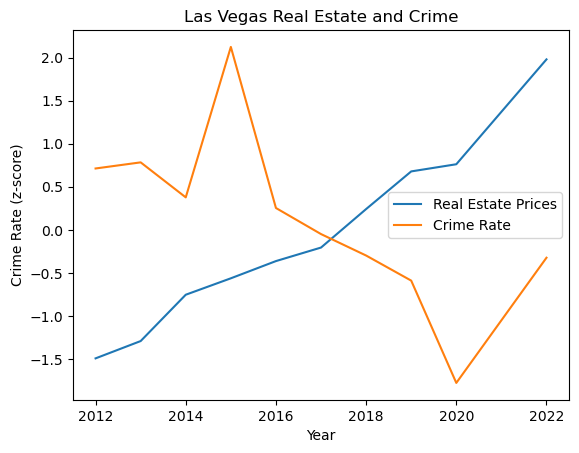

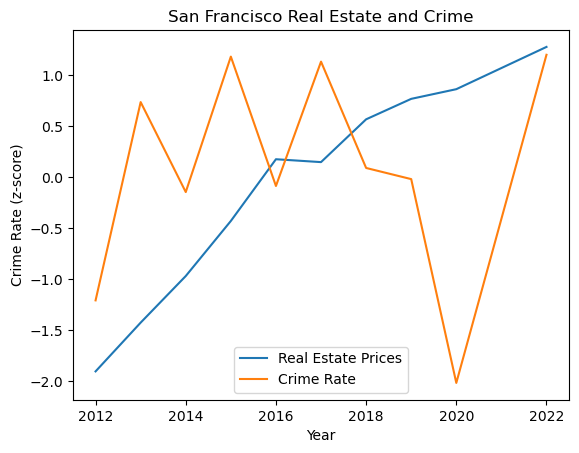

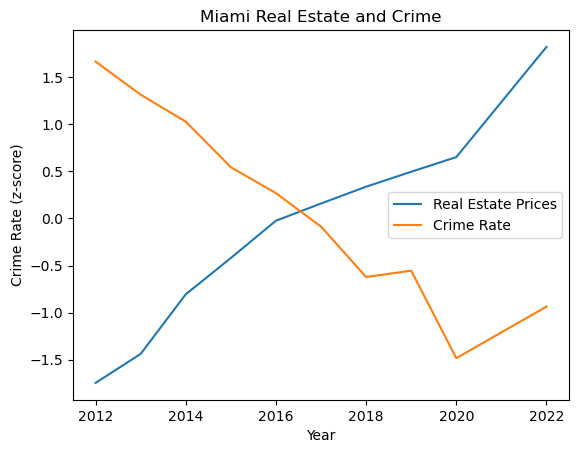

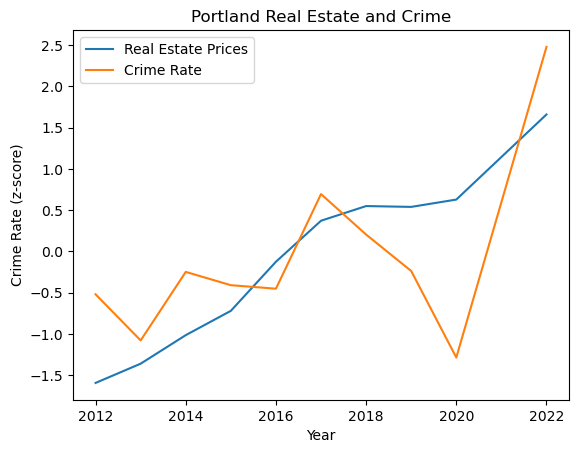

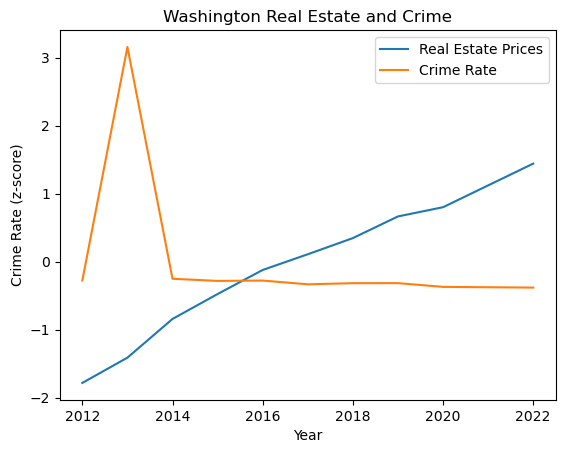

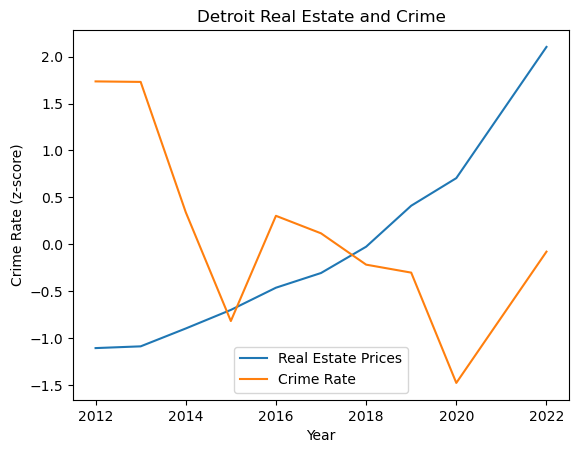

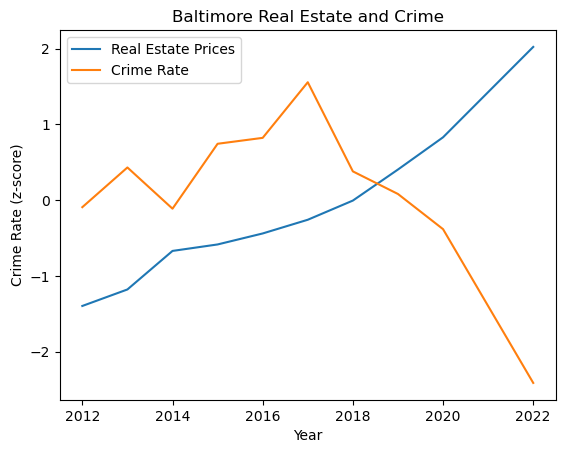

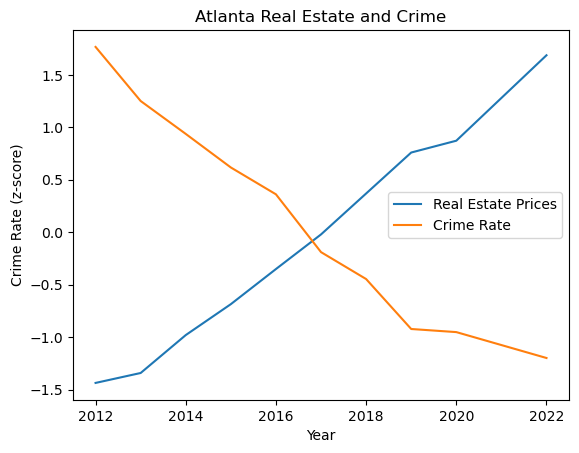

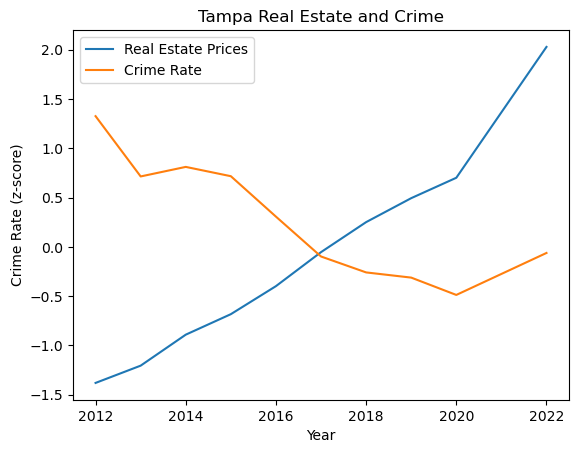

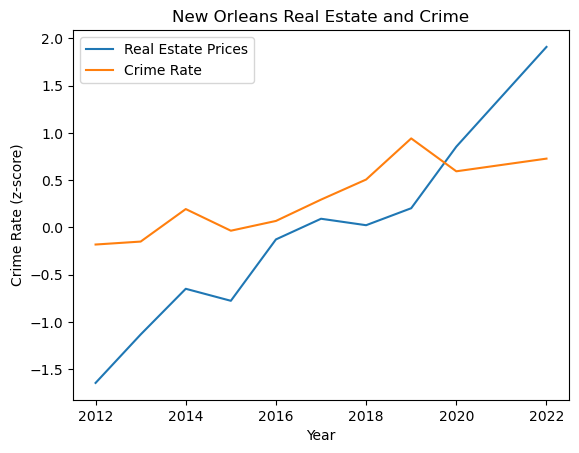

In [14]:
#create line graph for each city
for x, city in enumerate(cities):
    
    #create a graph for each city with the year, real estate price and crime number          
    plt.plot(crime_vs_real_estate.index, crime_vs_real_estate[city], label = "Real Estate Prices")
    plt.plot(crime_vs_real_estate.index, crime_vs_real_estate[city_pop_list[x]], label = "Crime Rate")
   
    #format the plot
    
    plt.title(f'{city} Real Estate and Crime')
    plt.xlabel('Year')
    plt.ylabel('Crime Rate (z-score)')
    plt.legend()
    plt.savefig(f'{city}_crime_vs_real_estate', dpi=300, format='png', bbox_inches='tight')
    plt.show()

Analysis of Population Changes on Real Estate Values

This study examines the impact of population dynamics on real estate prices, utilizing a comprehensive dataset derived primarily from FBI crime statistics that include annual population data. This data encompasses decennial population counts from cities and towns, supplemented by annual estimates from the U.S. Census Bureau. In instances where local data was unavailable, Census Bureau estimates were used to ensure dataset completeness. Notably, the inclusion of the year 2021 marked the restoration of complete data coverage, enhancing the study's scope and reliability.

To facilitate accurate comparisons between population changes and real estate prices, the population data was normalized using z-scores. This standardization process ensures that the variations in population scale across different regions do not skew the analysis, allowing for a clear assessment of the relationship between population growth and real estate market trends.

The initial hypothesis posited that increases in population would correspond with rises in housing prices. This assumption is based on the economic principle that limited housing supply coupled with increased demand—driven by population growth—would naturally lead to higher real estate prices. The subsequent sections of this report detail the methods used to analyze the data and the results of our statistical tests.

In [15]:
#create data frame to correlate population changes to real estate prices
population_data = crime_by_city_data[['Year', 'Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop', 'Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']]
population_data

,Year,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
0,2012,1479393,820363,414327,598037,632323,707096,625474,437041,350758,362874
1,2013,1500455,833863,418394,609136,646449,699889,622671,451020,351314,377022
2,2014,1530899,850294,421996,615672,658893,684694,623513,454363,357124,387113
3,2015,1562134,863782,437969,631945,672228,673225,621252,464710,364383,393447
4,2016,1592178,871155,449469,642129,681170,669673,618385,472579,375904,397208
5,2017,1627244,881255,463009,649408,693972,670792,613217,481343,384360,397447
6,2018,1644390,889282,473047,657260,702455,671275,605436,496106,392945,396374
7,2019,1666803,886007,480505,662114,705749,663502,597239,507301,400501,394498
8,2020,1693061,881514,476102,662941,712816,659616,583132,499586,407350,393779
9,2021,1685021,815201,439890,664350,670050,673708,576498,521274,387050,376971


Standardization and Scaling

Once again, to ensure rigorous comparability across diverse datasets, all data was meticulously scaled and standardized into z-scores. This statistical normalization process adjusts for variations in data scale and measurement units, allowing us to conduct analyses that are both accurate and unbiased. By converting raw data into z-scores, we effectively neutralize disparate data magnitudes, facilitating a more precise evaluation of underlying trends and relationships.

In [16]:
#Scales population data to z-scores to accurately compare population changes to real estate prices
scaler = StandardScaler()
scaled_population_data = scaler.fit_transform(population_data)
scaled_population_data_df = scaled_df = pd.DataFrame(scaled_population_data, columns=population_data.columns)


In [17]:
#concat the population data to the real estate data 
scaled_real_estate_prices_df.reset_index(drop=True, inplace=True)
scaled_population_data_df.reset_index(drop=True, inplace=True)
population_vs_real_estate = pd.concat([scaled_real_estate_prices_df, scaled_population_data_df], axis=1, join='inner')
#adding the year column back in 
years = list(range(2012,2023))
population_vs_real_estate['Year'] = years
#reordering columns to make years first
population_vs_real_estate = population_vs_real_estate[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland', 'Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans', 'Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop','Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']]
population_vs_real_estate.set_index('Year', inplace=True)
population_vs_real_estate


,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
Year,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489,-1.720222,-0.818927,-1.483137,-1.817805,-1.853035,1.707952,1.046490,-1.710115,-1.457932,-1.985448
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063,-1.430627,-0.454186,-1.302159,-1.318756,-1.268222,1.349586,0.901701,-1.154848,-1.428552,-0.774890
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730,-1.012034,-0.010255,-1.141873,-1.024876,-0.753043,0.594017,0.945195,-1.022059,-1.121541,0.088535
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807,-0.582565,0.354163,-0.431088,-0.293186,-0.200977,0.023723,0.828402,-0.611061,-0.737963,0.630497
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535,-0.169471,0.553366,0.080653,0.164721,0.169220,-0.152899,0.680307,-0.298493,-0.129174,0.952303
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062,0.312672,0.826247,0.683172,0.492010,0.699220,-0.097257,0.413354,0.049627,0.317656,0.972752
2018,0.240767,0.568084,0.337394,0.549173,0.348004,-0.026734,-0.006258,0.369231,0.250748,0.023783,0.548423,1.043120,1.129854,0.845063,1.050414,-0.073240,0.011425,0.636035,0.771302,0.880942
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399,0.856593,0.954636,1.461729,1.063315,1.186785,-0.459751,-0.411992,1.080717,1.170574,0.720425
2020,0.761179,0.863797,0.651508,0.627914,0.802333,0.704759,0.829311,0.872310,0.700922,0.854570,1.217631,0.833244,1.265799,1.100500,1.479357,-0.652982,-1.140690,0.774266,1.532487,0.658904


In [18]:
#Creates a Pearson matrix to calculate correlation between population changes and real estate prices
pearson_pop_correlation_matrix = population_vs_real_estate.corr()
pearson_pop_correlation_matrix

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Pop,San Fran Pop,Miami Pop,Portland Pop,Wash Pop,Detroit Pop,Balt Pop,Atlanta Pop,Tampa Pop,New Orleans Pop
Las Vegas,1.000000,0.941200,0.980067,0.966510,0.971284,0.975377,0.988411,0.989096,0.993914,0.973227,0.908520,-0.253595,0.624602,0.672230,0.576074,-0.907580,-0.948335,0.874457,0.828272,0.064416
San Francisco,0.941200,1.000000,0.974457,0.972534,0.985326,0.871188,0.903383,0.961585,0.928312,0.927840,0.975614,0.043046,0.794184,0.856000,0.775267,-0.876941,-0.848472,0.935112,0.920965,0.363638
Miami,0.980067,0.974457,1.000000,0.986173,0.986480,0.935677,0.959902,0.976893,0.975788,0.973662,0.930461,-0.157189,0.674053,0.733048,0.643871,-0.928946,-0.892871,0.882346,0.843967,0.201884
Portland,0.966510,0.972534,0.986173,1.000000,0.983418,0.929882,0.943136,0.982866,0.973647,0.963503,0.949357,-0.123293,0.711268,0.769697,0.663854,-0.876618,-0.898573,0.912706,0.874796,0.191271
Washington,0.971284,0.985326,0.986480,0.983418,1.000000,0.928690,0.953990,0.984150,0.965501,0.965260,0.968810,-0.084241,0.707066,0.813062,0.685267,-0.867939,-0.908963,0.943952,0.883052,0.237672
Detroit,0.975377,0.871188,0.935677,0.929882,0.928690,1.000000,0.991337,0.962939,0.986297,0.965749,0.846849,-0.418196,0.482061,0.577151,0.418158,-0.836684,-0.981103,0.831466,0.740072,-0.129433
Baltimore,0.988411,0.903383,0.959902,0.943136,0.953990,0.991337,1.000000,0.972454,0.990220,0.982807,0.877162,-0.349064,0.524734,0.621164,0.485230,-0.871998,-0.972458,0.849961,0.770454,-0.031057
Atlanta,0.989096,0.961585,0.976893,0.982866,0.984150,0.962939,0.972454,1.000000,0.988000,0.965412,0.951451,-0.165311,0.693634,0.752188,0.640626,-0.868561,-0.949738,0.922467,0.884778,0.116864
Tampa,0.993914,0.928312,0.975788,0.973647,0.965501,0.986297,0.990220,0.988000,1.000000,0.980802,0.899882,-0.300727,0.593510,0.654330,0.536671,-0.886782,-0.959986,0.868990,0.809963,0.010532
New Orleans,0.973227,0.927840,0.973662,0.963503,0.965260,0.965749,0.982807,0.965412,0.980802,1.000000,0.898054,-0.281693,0.561342,0.664377,0.538306,-0.880985,-0.942665,0.855926,0.789903,0.065417


Analysis Using Pearson Coefficient Matrix and Visualization Techniques

The standardized z-scores for population and real estate data were integrated into a Pearson Coefficient matrix to assess the strength of correlation between these variables. From this matrix, correlation coefficients specifically examining the relationship between real estate values and population figures were meticulously extracted.

These coefficients were subsequently visualized in a scatter plot to provide an intuitive graphical representation of the correlations. To enhance this visual analysis, linear regression graphs for each city were also generated. These linear representations help to highlight any underlying patterns or trends that might not be immediately apparent from the Pearson coefficients alone, offering a comprehensive view of how population changes might influence real estate prices across different urban areas.

0 Las Vegas 0.9085197211716847
1 San Francisco 0.04304640506188916
2 Miami 0.6740534278310658
3 Portland 0.7696965554746397
4 Washington 0.6852665950824632
5 Detroit -0.8366838383883312
6 Baltimore -0.9724575738325335
7 Atlanta 0.9224666263047162
8 Tampa 0.8099626535315853
9 New Orleans 0.06541717396527182


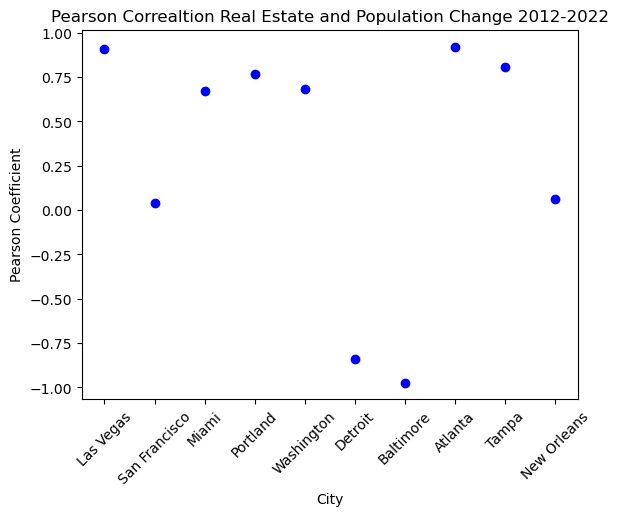

In [19]:
#Extract the Pearson Coefficient for each city for the real estate prices and populations changes from 2012-2024
city_pop_list= ['Las Vegas Pop', 'San Fran Pop', 'Miami Pop', 'Portland Pop', 'Wash Pop','Detroit Pop', 'Balt Pop', 'Atlanta Pop', 'Tampa Pop', 'New Orleans Pop']

x = []
y = []
for i, city in enumerate(cities):
    x.append(city)
    y.append(pearson_pop_correlation_matrix.loc[city, city_pop_list[i]])

    print(i, city, pearson_pop_correlation_matrix.loc[city, city_pop_list[i]])

#create a graph for each city with the year, real estate price and homeless population        
plt.scatter(x,y, color='blue', marker='o')
   
#format the plot

plt.title(f'Pearson Correaltion Real Estate and Population Change 2012-2022')
plt.xlabel('City')
plt.ylabel('Pearson Coefficient')
plt.xticks(rotation=45)
plt.savefig('pearson_pop_vs_real_estate', dpi=300, format='png', bbox_inches='tight')
plt.show()

Refined Analysis of Correlation Coefficients
Las Vegas (0.909): The very strong positive correlation in Las Vegas indicates that the increase in housing prices is closely aligned with the increase in the second variable. This suggests that both variables may be driven up by similar factors or that they positively reinforce each other.

San Francisco (0.043): Despite the general rise in housing prices, the negligible correlation in San Francisco suggests that the other variable does not significantly impact or is not impacted by housing prices. This implies independent factors influencing each.

Miami (0.674): A moderate to strong positive correlation in Miami indicates that as housing prices increased, the second variable also generally increased, suggesting a possible synergistic or parallel influence between the two.

Portland (0.770): With a strong positive correlation, Portland's data implies that rises in the second variable might have complemented the housing price increases, suggesting a possible contributory factor to the housing market's dynamics.

Washington (0.685): This strong positive correlation suggests that the factors driving up housing prices in Washington are potentially linked to increases in the second variable, indicating a related or mutually reinforcing relationship.

Detroit (-0.837) and Baltimore (-0.972): These cities show strong negative correlations despite rising housing prices, indicating that the other variable moved inversely relative to housing prices. This could imply that rising housing prices might be happening despite negative trends in the other variable, possibly due to external economic or policy factors.

Atlanta (0.923): Almost a perfect positive correlation, suggesting that in Atlanta, the variable closely tracked with the rise in housing prices, potentially indicating a very strong complementary relationship.

Tampa (0.810): Another example of a strong positive correlation, where the increase in the second variable might be seen as a contributor to or moving in tandem with the increase in housing prices.

New Orleans (0.065): Similar to San Francisco, the very weak correlation here suggests that the rise in housing prices is largely independent of the other studied variable, indicating that other factors are at play.

Summary and Implications
Strong Positive Correlations (Las Vegas, Miami, Portland, Washington, Atlanta, Tampa): In these cities, the variable studied alongside housing prices seems to either contribute to or increase in conjunction with housing prices, suggesting a potential area for further investigation into causative factors or reinforcing trends.

Strong Negative Correlations (Detroit, Baltimore): These indicate that the rising housing prices are occurring despite decreases in the other variable, which could highlight resilience in the housing market or effectiveness of counteracting policy measures.

Negligible Correlations (San Francisco, New Orleans): Here, housing price increases appear to be decoupled from the changes in the studied variable, suggesting that other factors (economic, demographic, or policy-driven) are influencing the housing markets.

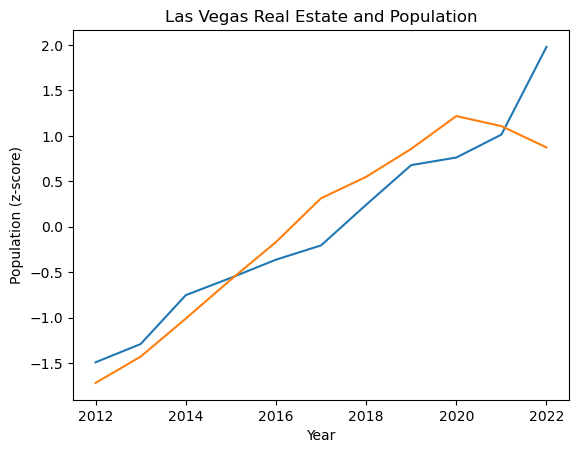

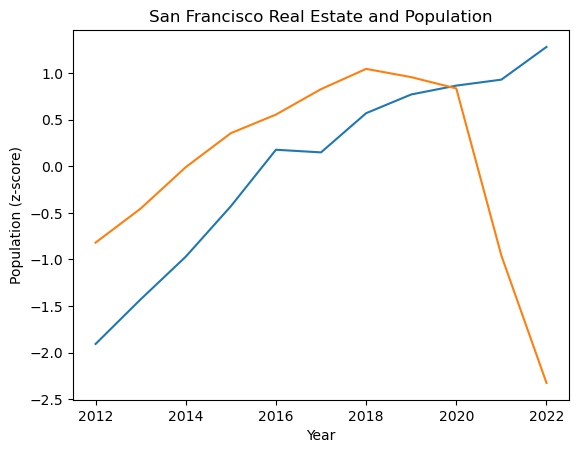

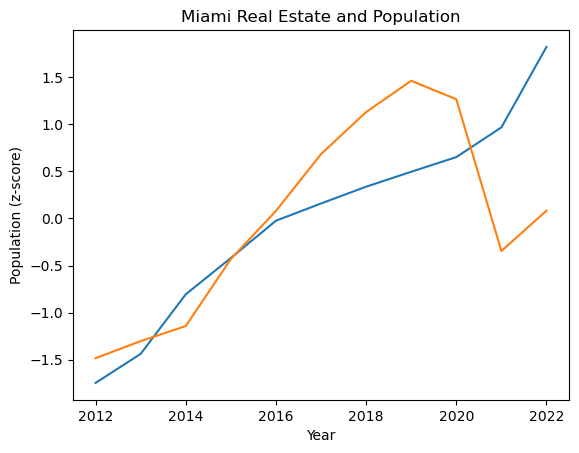

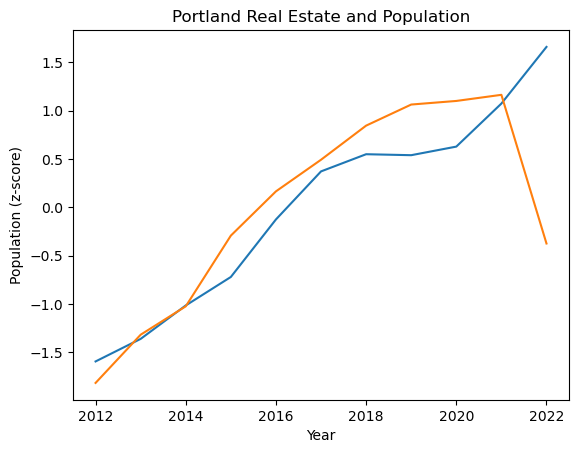

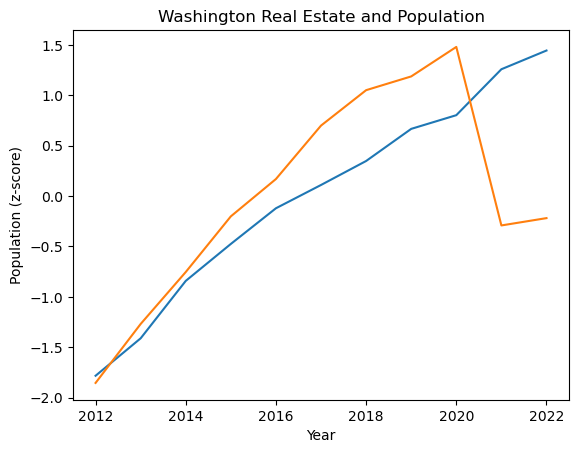

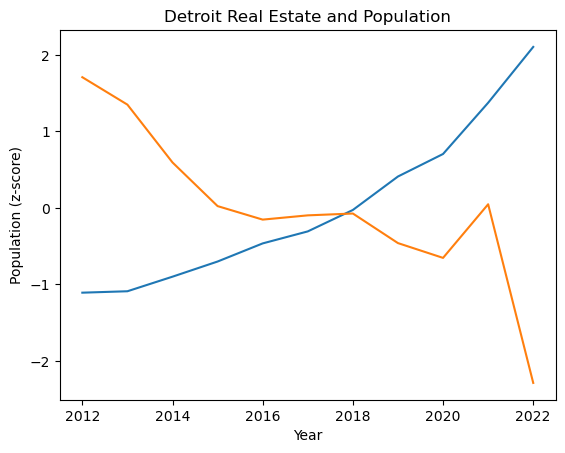

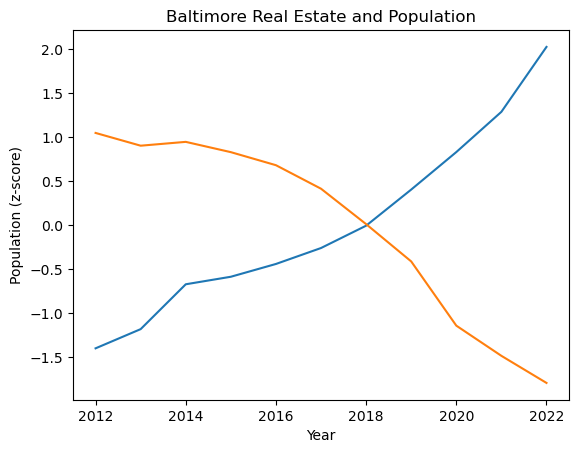

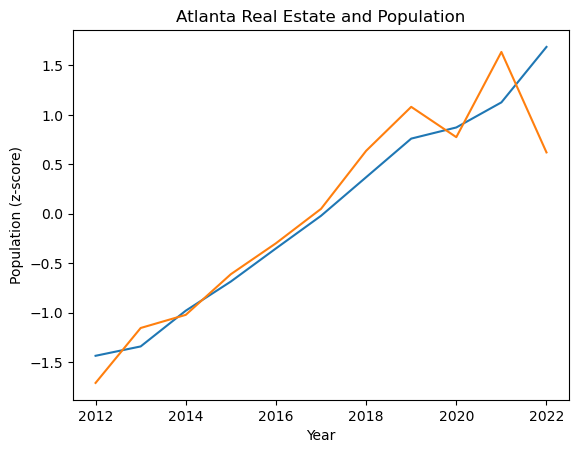

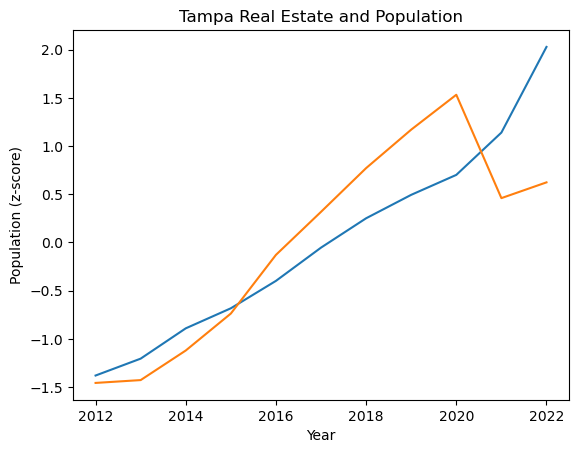

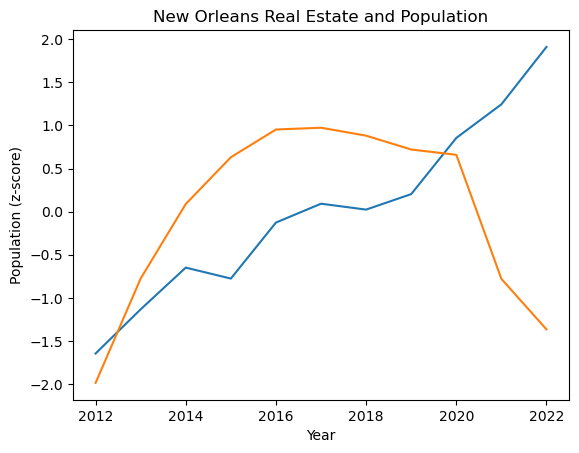

In [20]:
#create line graph for each city
for x, city in enumerate(cities):
    
    #create a graph for each city with the year, real estate price and crime number          
    plt.plot(population_vs_real_estate.index, population_vs_real_estate[city], label = "Real Estate Prices")
    plt.plot(population_vs_real_estate.index, population_vs_real_estate[city_pop_list[x]], label = "Population")
    
    #format the plot
    
    plt.title(f'{city} Real Estate and Population')
    plt.xlabel('Year')
    plt.ylabel('Population (z-score)')
    plt.savefig(f'{city}_pop_vs_real_estate')
    plt.show()

Analysis of the Impact of Homelessness on Real Estate Values

This study leverages data from the "HUD Point-in-Time (PIT) Counts by Continuum of Care (CoC)," a program designed to foster community-wide efforts to end homelessness. This initiative provides funding for efforts by nonprofit providers, states, and Indian tribes or tribally designated housing entities. CoCs—collaborations of governmental and non-governmental organizations—operate within designated metropolitan or rural areas and are required to perform biennial PIT counts of the homeless population. This data is systematically compiled into annual datasets available for analysis ([HUD CoC Program Overview.](https://www.hud.gov/program_offices/comm_planning/coc/pit-count)

For this analysis, ten annual datasets spanning various years were consolidated into a single DataFrame. Specific data relevant to urban centers and homeless counts were then extracted into another DataFrame for detailed examination. Notably, data for the years 2018 and 2019 was unavailable, prompting their exclusion from the analysis.

To ensure accurate comparative analysis across different scales, the data was normalized using z-scores. These standardized values were then analyzed using a Pearson Correlation Matrix to identify potential correlations between homelessness rates and real estate values in each city. The resulting correlation coefficients were visually represented in a scatter plot to provide an initial overview of the relationships.

To complement the scatter plot and uncover subtler trends, line graphs for each city were generated based on the standardized data. These visualizations aimed to highlight any trends or anomalies not immediately apparent from the Pearson correlation analysis alone, providing a more comprehensive understanding of how variations in homelessness may impact real estate markets across different urban environments.

In [21]:
#Creates a list of years that HUD homeless data is available
years = [2012, 2013, 2014, 2015, 2016, 2017, 2019, 2021,2022]
#Creates a list of CoCs that coorespond to the cities in the study
coc_name = ["San Francisco CoC", "Tampa/Hillsborough County CoC", "Miami-Dade County CoC", "Atlanta CoC","New Orleans/Jefferson Parish CoC", "Baltimore County CoC", "Detroit CoC", "Portland, Gresham/Multnomah County CoC", "Las Vegas/Clark County CoC", "District of Columbia CoC"]
#Inititalizes a list in order place the homeless data for each city per year
filtered_dataframes =[]
for year in years:
    path = "./Michaels_CSVs/" + str(year) + ".csv"
    try:
        year_df =pd.read_csv(path)
        filtered_df = year_df[year_df['CoC Name'].isin(coc_name)].copy()
        filtered_df[f'Year'] = year
        filtered_dataframes.append(filtered_df)
    except Exception as e:
        print(f"Failed to process {path}: {e}")
#Creates a data frame from the filtered homeless data
homeless_data_df=pd.concat(filtered_dataframes)


In [22]:
#Filters the relevant columns of year, city and homeless count
homeless_by_year = homeless_data_df[['Year', 'CoC Name', 'Overall Homeless']]
#Removes the comma from the homeless number in order to create into an integer
homeless_by_year['Overall Homeless'] = homeless_by_year['Overall Homeless'].str.replace(',','').astype(int)
#Creates a pivot table to index by year and use the values in the CoC columns to create new columns then use corresponding data as the data frame values
homeless = homeless_by_year.pivot_table(index='Year', columns='CoC Name', values='Overall Homeless')
#Renames the columns by city
homeless = homeless.rename(columns={'CoC Name' : 'Year', 'Atlanta CoC' : 'Atlanta Homeless', 'Baltimore County CoC' : 'Baltimore Homeless', 'Detroit CoC' : 'Detroit Homeless', 'District of Columbia CoC' : 'Washington Homeless', 'Las Vegas/Clark County CoC' : 'Las Vegas Homeless', 'Miami-Dade County CoC' : 'Miami Homeless', 'New Orleans/Jefferson Parish CoC' : 'New Orleans Homeless', 'Portland, Gresham/Multnomah County CoC' : 'Portland Homeless', 'San Francisco CoC' : 'San Francisco Homeless', 'Tampa/Hillsborough County CoC' : 'Tampa Homeless'})

homeless

C:\Users\puckr\AppData\Local\Temp\ipykernel_23196\66580328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homeless_by_year['Overall Homeless'] = homeless_by_year['Overall Homeless'].str.replace(',','').astype(int)


CoC Name,Atlanta Homeless,Baltimore Homeless,Detroit Homeless,Washington Homeless,Las Vegas Homeless,Miami Homeless,New Orleans Homeless,Portland Homeless,San Francisco Homeless,Tampa Homeless
Year,,,,,,,,,,
2012,6811,800,3115,6954,7323,3976,4903,4423,5895,7419
2013,5536,919,2789,6865,5952,3802,2337,4441,7008,1909
2014,4797,569,2755,7748,7443,4156,1981,3927,6408,1944
2015,4317,745,2597,7298,7509,4152,1703,3801,6775,1931
2016,4063,763,2335,8350,6208,4235,1626,3914,6996,1817
2017,3572,609,2078,7473,6490,3721,1301,4177,6858,1549
2019,3217,735,1965,6521,5530,3472,1179,4015,8035,1650
2021,1996,270,1293,5111,5083,3224,1042,1780,4000,870
2022,2017,468,1691,4410,5645,3276,1214,5228,7754,1513


In [23]:
#Adusting homeless numbers to percentage of population
#population_data = population_data[~population_data.index.isin([6,8])]
population_data.set_index('Year', inplace=True)

homeless_pop_df = pd.concat([homeless, population_data], axis=1, join='inner')
homeless_pop_df.rename(columns={'Wash Pop' : 'Washington Pop',
                                'San Fran Pop' : 'San Francisco Pop',
                                'Balt Pop' : 'Baltimore Pop'}, inplace=True)

for city in cities:
    homeless_col = f'{city} Homeless'
    population_col =f'{city} Pop'
    for year in years:
        homeless_rate= homeless_pop_df.loc[year,homeless_col] / homeless_pop_df.loc[year, population_col] 
        homeless_pop_df.loc[year, homeless_col] = homeless_rate

homeless = homeless_pop_df


In [24]:
#scales the homeless data into z scores in order to correlate with real estate prices
scaler = StandardScaler()
scaled_homeless = scaler.fit_transform(homeless)
scaled_homeless_df = scaled_df = pd.DataFrame(scaled_homeless, columns=homeless.columns)

In [25]:
#remove the two missing years from the real estate data frame to match that of the homeless data frame
scaled_real_estate_prices_df = scaled_real_estate_prices_df[~scaled_real_estate_prices_df.index.isin([6,8])]
scaled_real_estate_prices_df

Year,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans
0,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489
1,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063
2,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730
3,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807
4,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535
5,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062
7,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399
9,1.013405,0.927828,0.967032,1.073469,1.258062,1.374108,1.286230,1.125915,1.140055,1.244198
10,1.978992,1.278477,1.821176,1.659643,1.443607,2.103747,2.022780,1.686502,2.028927,1.909612


In [26]:
#Resets the index to a continuous list of numbers
scaled_real_estate_prices_df.reset_index(inplace=True)


In [27]:

#concat the homeless data to the real estate data 
homeless_vs_real_estate = pd.concat([scaled_real_estate_prices_df, scaled_homeless_df], axis=1, join='inner')
#adding the year column back in 
homeless_vs_real_estate['Year'] = years
#reordering columns to make years first
homeless_vs_real_estate = homeless_vs_real_estate[['Year', 'Las Vegas', 'San Francisco', 'Miami', 'Portland', 'Washington', 'Detroit', 'Baltimore', 'Atlanta', 'Tampa', 'New Orleans', 'Las Vegas Homeless', 'San Francisco Homeless', 'Miami Homeless', 'Portland Homeless', 'Washington Homeless','Detroit Homeless', 'Baltimore Homeless', 'Atlanta Homeless', 'Tampa Homeless', 'New Orleans Homeless']]
homeless_vs_real_estate.set_index('Year', inplace=True)
homeless_vs_real_estate

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Homeless,San Francisco Homeless,Miami Homeless,Portland Homeless,Washington Homeless,Detroit Homeless,Baltimore Homeless,Atlanta Homeless,Tampa Homeless,New Orleans Homeless
Year,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489,1.373413,-0.514478,0.964892,0.748864,0.514225,1.383878,0.739180,1.925181,2.782595,2.670293
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063,-0.080587,0.391734,0.476492,0.677353,0.303115,0.815523,1.429106,1.004561,-0.156506,0.359262
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730,1.243048,-0.253883,1.206762,0.057291,0.939568,0.867945,-0.545066,0.527066,-0.154710,0.017582
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807,1.161767,-0.025401,0.853466,-0.189870,0.435415,0.643342,0.459387,0.174395,-0.181660,-0.231742
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535,-0.180757,0.113909,0.797932,-0.135097,1.218376,0.142106,0.580880,-0.018120,-0.268742,-0.305955
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062,-0.048731,-0.071016,-0.531247,0.093733,0.386272,-0.383694,-0.262774,-0.345377,-0.419013,-0.565146
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399,-1.040453,0.885979,-1.309021,-0.156466,-0.467469,-0.567915,0.569679,-0.645626,-0.402227,-0.655142
2021,1.013405,0.927828,0.967032,1.073469,1.258062,1.374108,1.286230,1.125915,1.140055,1.244198,-1.485803,-2.209572,-1.209862,-2.456981,-1.367803,-1.976998,-2.101847,-1.344396,-0.752296,-0.726078
2022,1.978992,1.278477,1.821176,1.659643,1.443607,2.103747,2.022780,1.686502,2.028927,1.909612,-0.941898,1.682727,-1.249415,1.361173,-1.961699,-0.924188,-0.868545,-1.277684,-0.447442,-0.563074


In [28]:
#Creates a matrix of Pearson Coefficients correlating homeless populations and real estate prices
pearson_homeless_correlation_matrix = homeless_vs_real_estate.corr()
pearson_homeless_correlation_matrix

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Homeless,San Francisco Homeless,Miami Homeless,Portland Homeless,Washington Homeless,Detroit Homeless,Baltimore Homeless,Atlanta Homeless,Tampa Homeless,New Orleans Homeless
Las Vegas,1.000000,0.942454,0.979766,0.969597,0.969739,0.978053,0.990935,0.989984,0.993705,0.973995,-0.784764,0.222031,-0.855138,-0.187614,-0.855891,-0.866923,-0.668129,-0.928567,-0.569486,-0.666363
San Francisco,0.942454,1.000000,0.978483,0.972995,0.986958,0.881946,0.912397,0.959245,0.929434,0.937059,-0.816262,0.157346,-0.826044,-0.325003,-0.682163,-0.899169,-0.607318,-0.975850,-0.699786,-0.808261
Miami,0.979766,0.978483,1.000000,0.987618,0.986792,0.939017,0.964591,0.977953,0.974753,0.978682,-0.770907,0.197155,-0.818061,-0.228328,-0.763200,-0.880333,-0.671969,-0.963855,-0.645825,-0.749003
Portland,0.969597,0.972995,0.987618,1.000000,0.985486,0.942952,0.956451,0.985897,0.976637,0.977102,-0.826214,0.148704,-0.879484,-0.256283,-0.783442,-0.919367,-0.676369,-0.956149,-0.609637,-0.715511
Washington,0.969739,0.986958,0.986792,0.985486,1.000000,0.932273,0.957020,0.982925,0.964113,0.968035,-0.822431,0.084827,-0.856865,-0.362238,-0.767128,-0.935183,-0.704188,-0.983948,-0.671207,-0.772233
Detroit,0.978053,0.881946,0.939017,0.942952,0.932273,1.000000,0.991724,0.971115,0.989620,0.964992,-0.795538,0.126370,-0.856316,-0.209156,-0.920831,-0.875753,-0.709110,-0.877237,-0.467303,-0.550407
Baltimore,0.990935,0.912397,0.964591,0.956451,0.957020,0.991724,1.000000,0.978112,0.993659,0.981572,-0.779718,0.138561,-0.838361,-0.230094,-0.887195,-0.881533,-0.733600,-0.917841,-0.552521,-0.634405
Atlanta,0.989984,0.959245,0.977953,0.985897,0.982925,0.971115,0.978112,1.000000,0.989787,0.968923,-0.831948,0.154871,-0.901647,-0.259558,-0.846470,-0.912822,-0.672241,-0.940637,-0.562043,-0.668509
Tampa,0.993705,0.929434,0.974753,0.976637,0.964113,0.989620,0.993659,0.989787,1.000000,0.983145,-0.802757,0.183748,-0.872298,-0.190715,-0.879678,-0.886476,-0.690935,-0.920033,-0.541696,-0.634258
New Orleans,0.973995,0.937059,0.978682,0.977102,0.968035,0.964992,0.981572,0.968923,0.983145,1.000000,-0.805936,0.126439,-0.822953,-0.245672,-0.814513,-0.904022,-0.740771,-0.945719,-0.630317,-0.705577


Las Vegas -0.7847640545766863
San Francisco 0.15734635599745478
Miami -0.8180608167910147
Portland -0.2562833146856638
Washington -0.76712811852896
Detroit -0.8757533559468069
Baltimore -0.7336001833889467
Atlanta -0.9406370202011528
Tampa -0.5416957820696398
New Orleans -0.7055772446559365


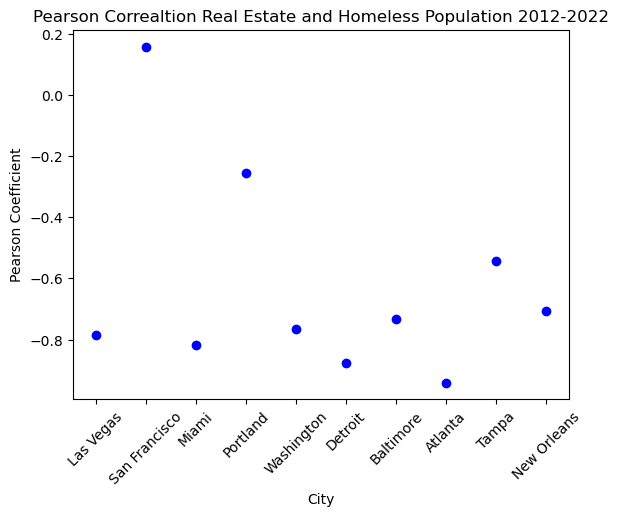

In [29]:
#Extract the Pearson Coefficient for each city for the real estate prices and homeless populations from 2012-2024
city_homeless_list= ['Las Vegas Homeless', 'San Francisco Homeless', 'Miami Homeless', 'Portland Homeless', 'Washington Homeless','Detroit Homeless', 'Baltimore Homeless', 'Atlanta Homeless', 'Tampa Homeless', 'New Orleans Homeless']

x = []
y = []
for i, city in enumerate(cities):
    x.append(city)
    y.append(pearson_homeless_correlation_matrix.loc[city, city_homeless_list[i]])
    print(city, pearson_homeless_correlation_matrix.loc[city, city_homeless_list[i]])

#create a graph for each city with the year, real estate price and homeless population        
plt.scatter(x,y, color='blue', marker='o')
   
#format the plot

plt.title(f'Pearson Correaltion Real Estate and Homeless Population 2012-2022')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Pearson Coefficient')
plt.savefig('pearson_homeless_vs_real_estate', dpi=300, format='png', bbox_inches='tight')
plt.show()

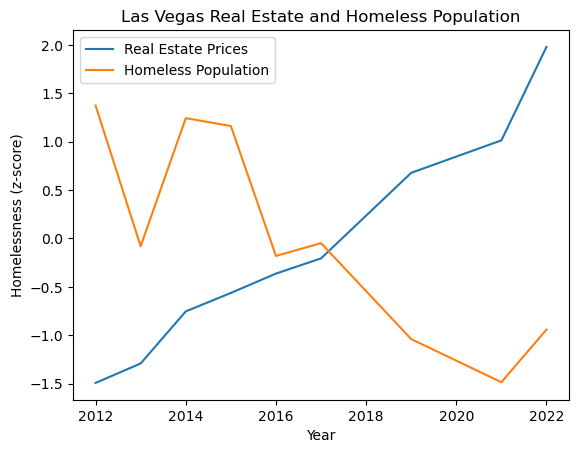

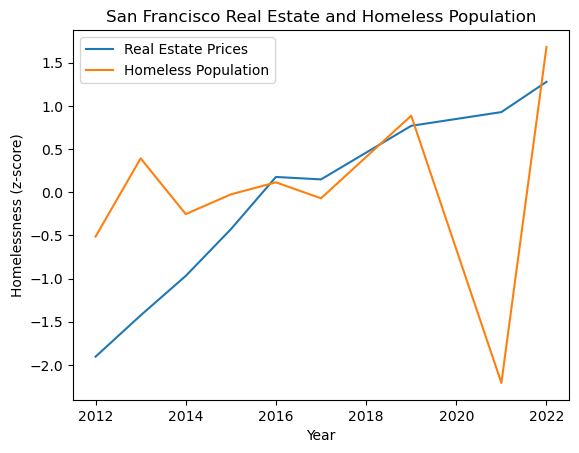

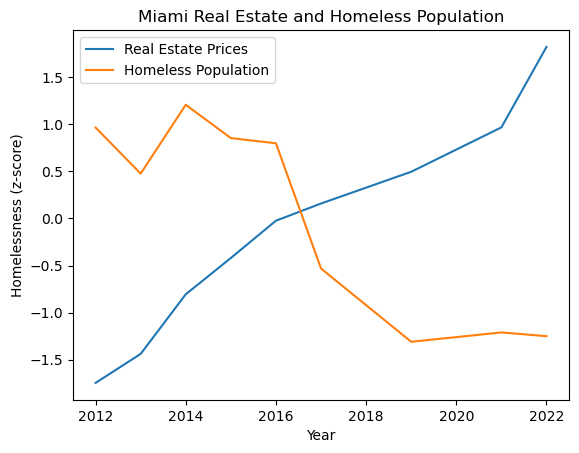

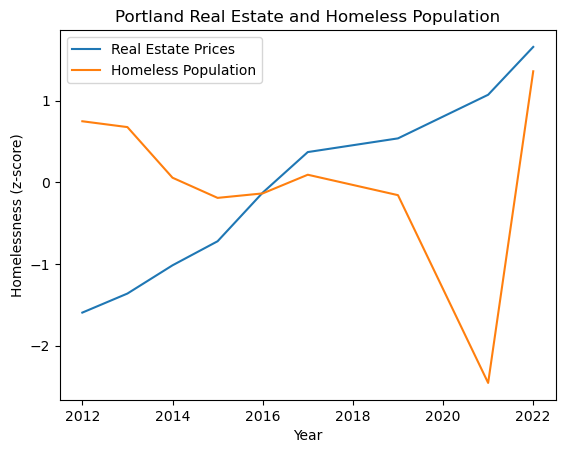

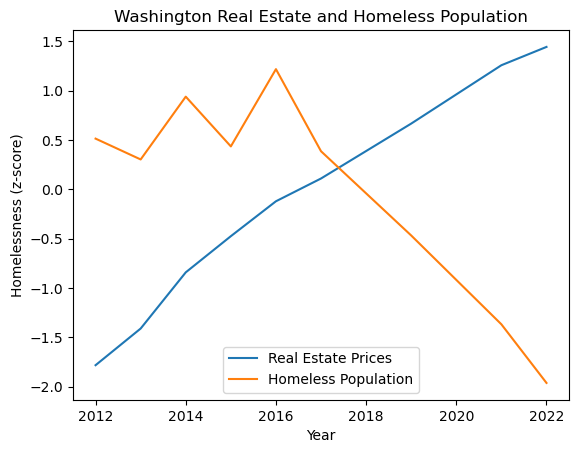

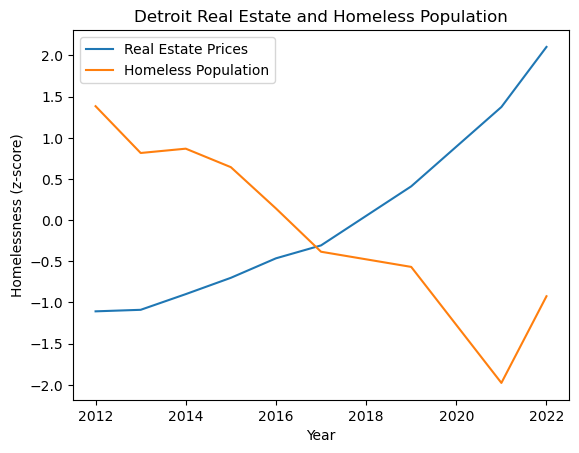

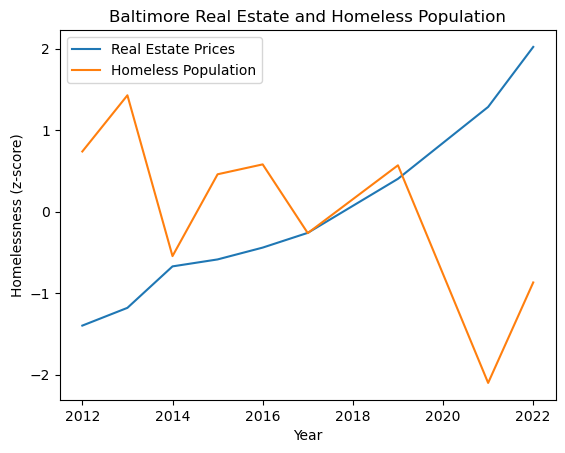

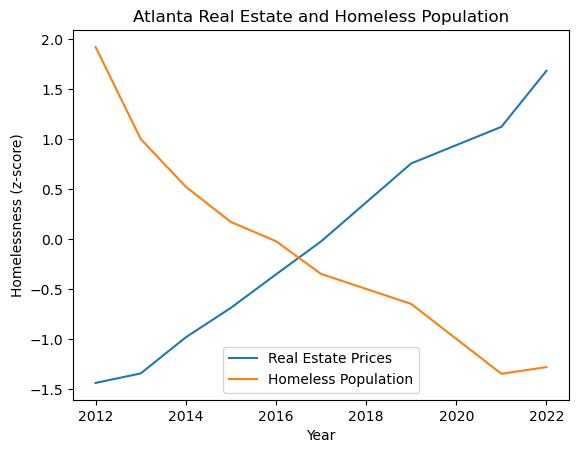

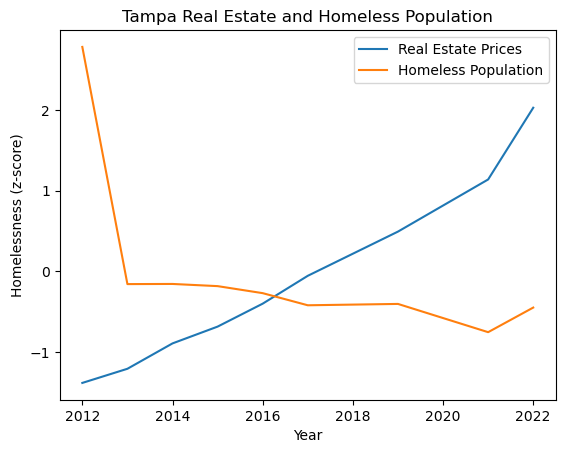

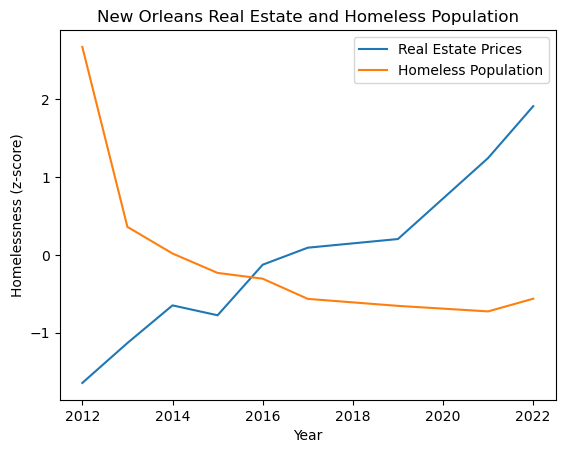

In [30]:

for x, city in enumerate(cities):
    
    #create a graph for each city with the year, real estate price and homeless population        
    plt.plot(homeless_vs_real_estate.index, homeless_vs_real_estate[city], label = "Real Estate Prices")
    plt.plot(homeless_vs_real_estate.index, homeless_vs_real_estate[city_homeless_list[x]], label = "Homeless Population")
    
    #format the plot
    
    plt.title(f'{city} Real Estate and Homeless Population')
    plt.xlabel('Year')
    plt.ylabel('Homelessness (z-score)')
    plt.legend()
    plt.savefig(f'{city}_homeless_vs_real_estate')
    plt.show()

In [31]:
homeless_vs_real_estate_mod = homeless_vs_real_estate[~homeless_vs_real_estate.index.isin([2021, 2022])]
homeless_vs_real_estate_mod

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Homeless,San Francisco Homeless,Miami Homeless,Portland Homeless,Washington Homeless,Detroit Homeless,Baltimore Homeless,Atlanta Homeless,Tampa Homeless,New Orleans Homeless
Year,,,,,,,,,,,,,,,,,,,,
2012,-1.493129,-1.905464,-1.745805,-1.595417,-1.781966,-1.107596,-1.398164,-1.435864,-1.381188,-1.644489,1.373413,-0.514478,0.964892,0.748864,0.514225,1.383878,0.739180,1.925181,2.782595,2.670293
2013,-1.292084,-1.426923,-1.437533,-1.361973,-1.410451,-1.089070,-1.180245,-1.341210,-1.205876,-1.132063,-0.080587,0.391734,0.476492,0.677353,0.303115,0.815523,1.429106,1.004561,-0.156506,0.359262
2014,-0.754075,-0.969752,-0.804843,-1.016077,-0.841070,-0.898547,-0.671244,-0.979939,-0.891431,-0.648730,1.243048,-0.253883,1.206762,0.057291,0.939568,0.867945,-0.545066,0.527066,-0.154710,0.017582
2015,-0.563354,-0.429326,-0.419777,-0.721265,-0.474537,-0.700491,-0.585796,-0.685197,-0.683383,-0.775807,1.161767,-0.025401,0.853466,-0.189870,0.435415,0.643342,0.459387,0.174395,-0.181660,-0.231742
2016,-0.363431,0.176351,-0.023707,-0.125958,-0.120764,-0.463761,-0.440672,-0.350682,-0.398970,-0.126535,-0.180757,0.113909,0.797932,-0.135097,1.218376,0.142106,0.580880,-0.018120,-0.268742,-0.305955
2017,-0.206277,0.148104,0.158808,0.371392,0.110186,-0.306898,-0.259667,-0.020698,-0.053787,0.092062,-0.048731,-0.071016,-0.531247,0.093733,0.386272,-0.383694,-0.262774,-0.345377,-0.419013,-0.565146
2019,0.678008,0.768824,0.495748,0.539098,0.666596,0.410484,0.403724,0.759631,0.493983,0.203399,-1.040453,0.885979,-1.309021,-0.156466,-0.467469,-0.567915,0.569679,-0.645626,-0.402227,-0.655142


In [32]:
#Creates a matrix of Pearson Coefficients correlating homeless populations and real estate prices
pearson_homeless_correlation_matrix_mod = homeless_vs_real_estate_mod.corr()
pearson_homeless_correlation_matrix_mod

,Las Vegas,San Francisco,Miami,Portland,Washington,Detroit,Baltimore,Atlanta,Tampa,New Orleans,Las Vegas Homeless,San Francisco Homeless,Miami Homeless,Portland Homeless,Washington Homeless,Detroit Homeless,Baltimore Homeless,Atlanta Homeless,Tampa Homeless,New Orleans Homeless
Las Vegas,1.000000,0.961636,0.957146,0.939710,0.979202,0.977212,0.997696,0.986158,0.985265,0.921394,-0.697914,0.678497,-0.776758,-0.804074,-0.456050,-0.919668,-0.307711,-0.931561,-0.624913,-0.765052
San Francisco,0.961636,1.000000,0.993000,0.971047,0.993208,0.927349,0.960128,0.958160,0.965889,0.963350,-0.714052,0.624937,-0.699027,-0.845075,-0.282719,-0.945592,-0.283859,-0.967738,-0.696335,-0.828483
Miami,0.957146,0.993000,1.000000,0.973913,0.995117,0.910440,0.961262,0.950447,0.962248,0.970671,-0.648245,0.552334,-0.676585,-0.866891,-0.253745,-0.937917,-0.387842,-0.975285,-0.698835,-0.836331
Portland,0.939710,0.971047,0.973913,1.000000,0.975807,0.933102,0.939078,0.967111,0.978023,0.966701,-0.732353,0.564974,-0.788678,-0.733543,-0.338108,-0.981715,-0.336769,-0.935918,-0.620108,-0.762594
Washington,0.979202,0.993208,0.995117,0.975807,1.000000,0.942019,0.981299,0.972571,0.981367,0.966898,-0.689346,0.615210,-0.730974,-0.842835,-0.336535,-0.950643,-0.348333,-0.974300,-0.693256,-0.829382
Detroit,0.977212,0.927349,0.910440,0.933102,0.942019,1.000000,0.963718,0.992551,0.982783,0.873315,-0.762529,0.706259,-0.861080,-0.680693,-0.554445,-0.923296,-0.189572,-0.860659,-0.496278,-0.647514
Baltimore,0.997696,0.960128,0.961262,0.939078,0.981299,0.963718,1.000000,0.978300,0.981492,0.933757,-0.680976,0.662764,-0.761824,-0.817181,-0.433164,-0.919643,-0.354220,-0.944878,-0.658826,-0.793258
Atlanta,0.986158,0.958160,0.950447,0.967111,0.972571,0.992551,0.978300,1.000000,0.997488,0.918662,-0.744643,0.665961,-0.841425,-0.729182,-0.493091,-0.951948,-0.262890,-0.907492,-0.557924,-0.708738
Tampa,0.985265,0.965889,0.962248,0.978023,0.981367,0.982783,0.981492,0.997488,1.000000,0.940417,-0.746878,0.659426,-0.837412,-0.739202,-0.470318,-0.966486,-0.293923,-0.929454,-0.602604,-0.746790
New Orleans,0.921394,0.963350,0.970671,0.966701,0.966898,0.873315,0.933757,0.918662,0.940417,1.000000,-0.715255,0.566764,-0.685447,-0.785771,-0.199861,-0.954632,-0.416476,-0.966607,-0.755865,-0.864091



To refine and clarify the explanation of how pandemic-related measures have influenced homelessness statistics and the study's focus, here’s an enhanced version of the text:

Impact of Pandemic Measures on Homelessness Trends

Our analysis reveals a notable decrease in homelessness across the cities studied in 2022, a trend likely influenced by the continuation or adaptation of pandemic-era housing interventions. As we move further from the peak of the public health crisis, these measures have evolved in response to shifting conditions:

Temporary Housing Initiatives: The deployment of hotels and other unconventional temporary housing solutions persisted into 2022, albeit likely at a reduced scale. This shift came as the urgent need of the pandemic's early days diminished and vaccination rates rose, potentially reducing the immediate demand for emergency housing.

Resumption of Traditional Homeless Counts: With the improvement in vaccination rates and the relaxation of COVID-19 restrictions, many regions likely resumed traditional Point-in-Time (PIT) counts. This shift could provide a more accurate assessment of the homeless population, offering clearer insights compared to the anomalous counts of 2021.

Economic Recovery and Housing Stability
The lingering economic repercussions of the pandemic continued to affect housing stability throughout 2022:

Economic Challenges and Support Mechanisms: Although the acute phase of the pandemic has passed, its economic impacts remain significant. Ongoing recovery efforts and supportive policies have been crucial in mitigating these effects, helping to stabilize housing markets and reduce homelessness.
Study Parameters and Considerations

In light of the significant, temporary reductions in homelessness due to pandemic relief efforts, our study deliberately excluded the years most impacted by these measures. By focusing on periods unaffected by emergency pandemic policies, we aimed to isolate and analyze correlations between persistent homelessness trends and the housing price crisis. This approach ensures that our findings more accurately reflect the underlying dynamics of the real estate market, devoid of the temporary distortions introduced by pandemic-related interventions.



Las Vegas -0.6979136672235319
San Francisco 0.6249369239801997
Miami -0.6765845974878124
Portland -0.7335433756631454
Washington -0.3365354888338903
Detroit -0.9232959149204799
Baltimore -0.35421975397902855
Atlanta -0.9074923064692412
Tampa -0.6026037731730223
New Orleans -0.86409059247164


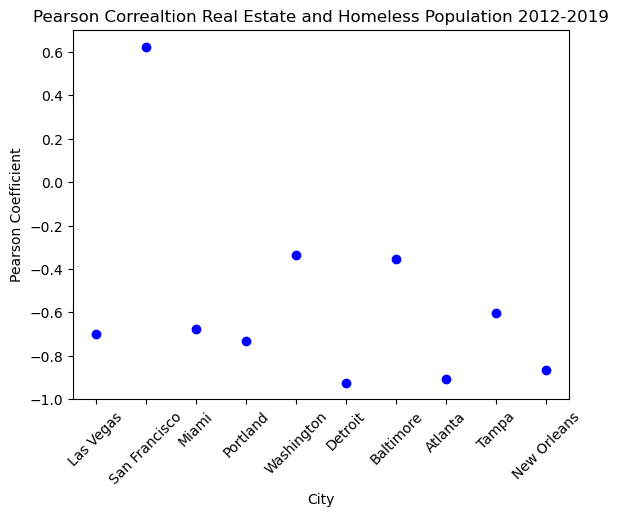

In [33]:
x = []
y = []
for i, city in enumerate(cities):
    x.append(city)
    y.append(pearson_homeless_correlation_matrix_mod.loc[city, city_homeless_list[i]])
    print(city, pearson_homeless_correlation_matrix_mod.loc[city, city_homeless_list[i]])

#create a graph for each city with the year, real estate price and homeless population        
plt.scatter(x,y, color='blue', marker='o')
   
#format the plot

plt.title(f'Pearson Correaltion Real Estate and Homeless Population 2012-2019')
plt.xlabel('City')
plt.ylabel('Pearson Coefficient')
plt.xticks(rotation=45)
plt.savefig('pearson_homeless_vs_real_estate_mod', dpi=300, format='png', bbox_inches='tight')
plt.show()

Current Study Results (Excluding Pandemic Years)

Las Vegas (-0.698): Shows a strong negative correlation, indicating that as homelessness decreases, housing prices likely increase. This correlation is somewhat less negative compared to the pandemic-influenced data, suggesting less volatility in non-pandemic conditions.

San Francisco (0.625): Displays a strong positive correlation, a significant change from the previous negligible correlation, indicating that both homelessness and housing prices may rise in tandem under normal circumstances.

Miami (-0.677): Exhibits a strong negative correlation, consistent with previous findings, suggesting a robust inverse relationship between homelessness and housing prices.

Portland (-0.734): A strong negative correlation, more pronounced than during the pandemic, indicating a clearer inverse relationship between homelessness and housing prices when pandemic distortions are removed.

Washington (-0.337): Shows a moderate negative correlation, much weaker than in other cities, suggesting that other factors may be influencing housing prices beyond homelessness.

Detroit (-0.923): This extremely strong negative correlation, stronger than in the pandemic data, underscores a significant inverse relationship, likely reflecting more stable market dynamics outside pandemic conditions.

Baltimore (-0.354): A weak negative correlation, indicating that the impact of homelessness on housing prices is less pronounced.

Atlanta (-0.907): Very strong negative correlation, consistent with the earlier findings, suggesting a stable pattern where increases in homelessness are associated with decreases in housing prices.

Tampa (-0.603): Shows a strong negative correlation, indicating a consistent inverse relationship between homelessness and housing prices.

New Orleans (-0.864): A very strong negative correlation, indicating a robust inverse relationship, more pronounced than during the pandemic years.

Comparative Insights
The removal of pandemic years generally reveals more pronounced negative correlations between homelessness and housing prices, with the exception of San Francisco which turned strongly positive. This suggests that:

Under normal conditions, the relationship between homelessness and housing prices is typically more stable and consistently negative, indicating that increases in homelessness tend to correspond with decreases in housing prices.

Pandemic-related interventions might have temporarily altered or obscured these trends, especially in cities like San Francisco where the correlation reversed.

Conclusion
The analysis highlights a clearer and more consistent pattern of negative correlations between homelessness and housing prices outside of pandemic years. This finding suggests that typical market dynamics, free from emergency interventions and temporary housing measures, may more reliably predict housing market responses to changes in homelessness. Policymakers and stakeholders should consider these underlying trends when designing long-term strategies to address housing and homelessness issues.








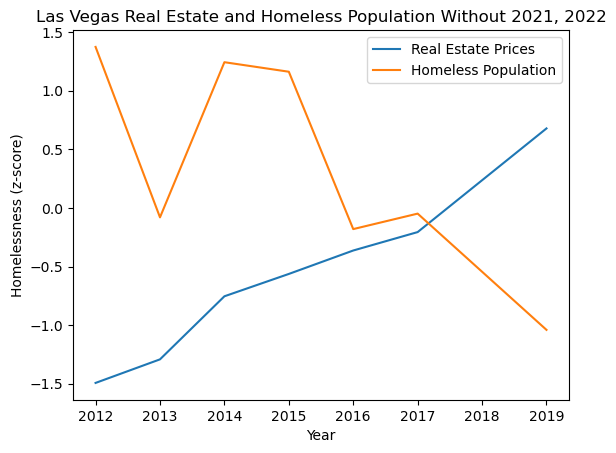

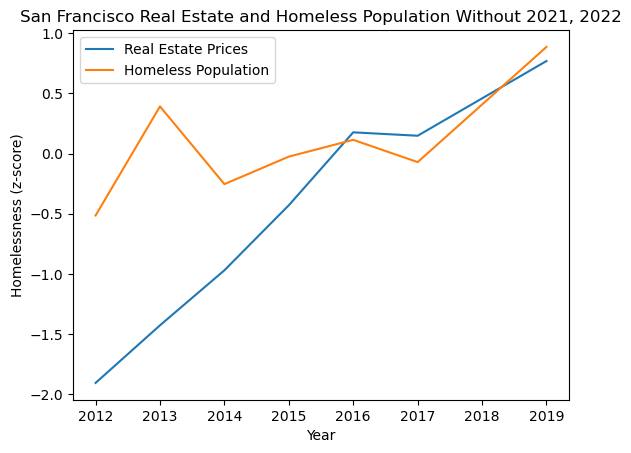

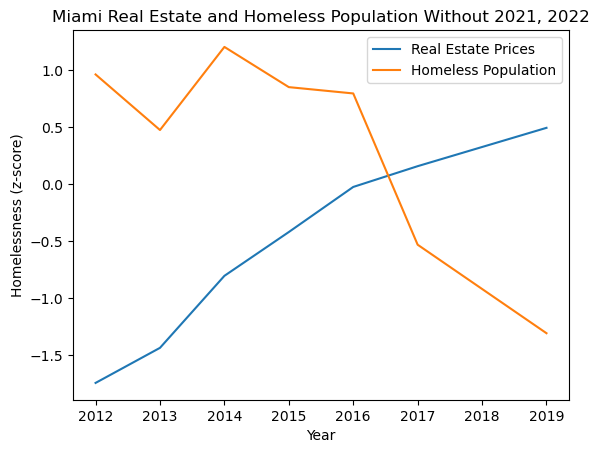

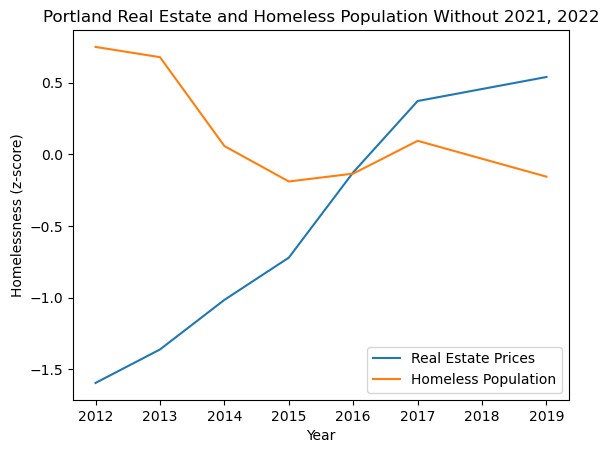

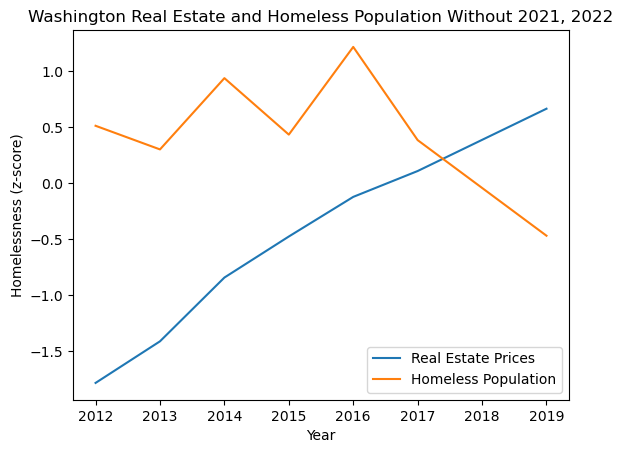

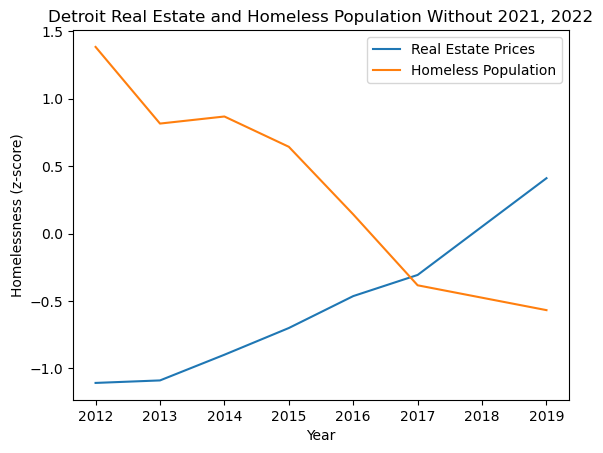

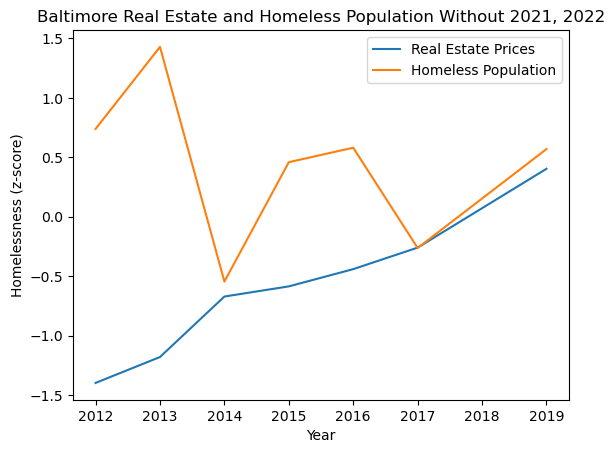

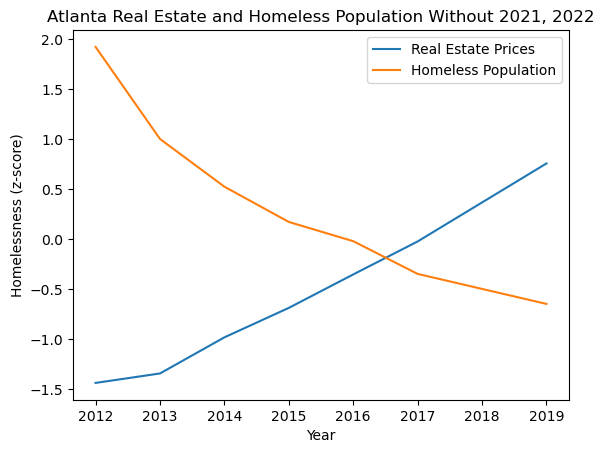

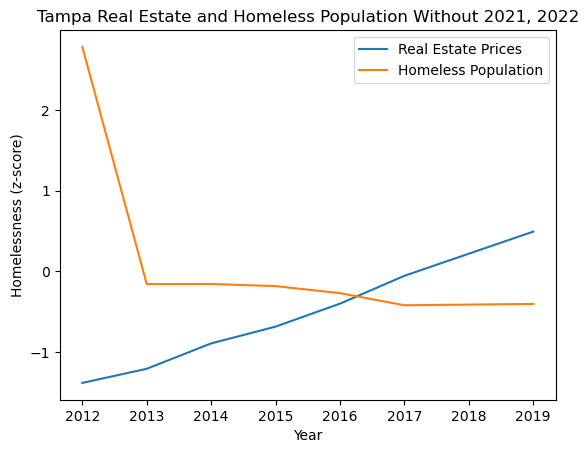

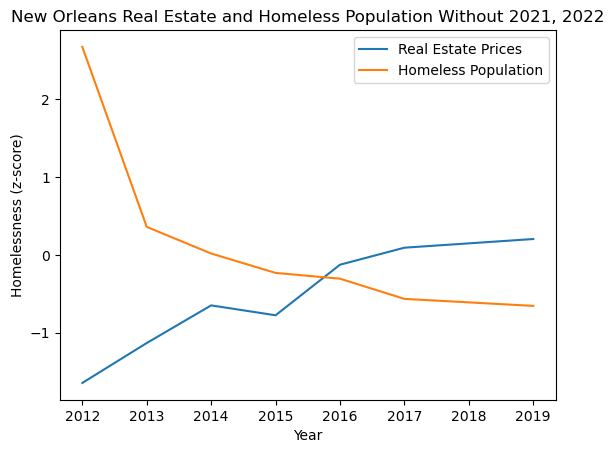

In [37]:
for x, city in enumerate(cities):
    
    #create a graph for each city with the year, real estate price and homeless population        
    plt.plot(homeless_vs_real_estate_mod.index, homeless_vs_real_estate_mod[city], label = "Real Estate Prices")
    plt.plot(homeless_vs_real_estate_mod.index, homeless_vs_real_estate_mod[city_homeless_list[x]], label = "Homeless Population")
    
    #format the plot    
    plt.title(f'{city} Real Estate and Homeless Population Without 2021, 2022')
    plt.xlabel('Year')
    plt.ylabel('Homelessness (z-score)')
    plt.legend()
    plt.savefig(f'{city}_homeless_vs_real_estate_mod', dpi=300, format='png', bbox_inches='tight')
    plt.show()